#### 2.3.1. Загрузка данных и первичный анализ

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)

In [35]:
df = pd.read_csv('S05-hw-dataset.csv')
display(df.head())
display(df.info())
display(df.describe())
# Распределение таргета default
target_counts = df["default"].value_counts(dropna=False)
target_share = df["default"].value_counts(normalize=True, dropna=False)
display(target_counts)
display(target_share)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

None

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


default
0    1769
1    1231
Name: count, dtype: int64

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Всего 3000 объектов и 17 столбцов. Пропусков нет. Из аномалий замечено отрицательное значение для `checking_balance` (min = -3000), в остальном всё выглядит нормально. Таргет `default` : класс 0 - 59%, класс 1 - 41% приемлимо сбалансирован

#### 2.3.2. Подготовка признаков и таргета

In [36]:
# Подготовка признаков и таргета
feature_cols = [c for c in df.columns if c not in ["default", "client_id"]]
X = df[feature_cols]
y = df["default"]
# из прошлого вывода видно что debt_to_income в [0, 1]

#### 2.3.3. Train/Test-сплит и бейзлайн-модель

In [37]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
# Бейзлайн DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
# обучаем и предсказываем
dummy.fit(X_train, y_train)

y_pred = dummy.predict(X_test)
y_prob = dummy.predict_proba(X_test)[:, 1]

baseline_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_prob),
}

baseline_results

{'accuracy': 0.5893333333333334, 'roc_auc': 0.5}

По итогу у безлайн модели DummyClassifier accuracy составляет 58.9%, roc-auc - 0.5. Он предсказывает наиболее встречаемый класс (класс 0, не дефолт). ROC-AUC = 0.5 означает что модель случайно угадывает.
На примере бейзлайна можно увидеть минимальный порог качества, котрое должна превзойти будущая модель. Если модель не проходит порог бейзлайна, то возможны проблемы в реализации модели. Получается так можно понять корректность модели.


#### 2.3.4. Логистическая регрессия и подбор гиперпараметров

In [38]:
from sklearn.model_selection import GridSearchCV
# Построим Pipeline с StandardScaler и LogisticRegression
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])
# Подбор гиперпараметра C с помощью GridSearchCV
param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0]
}
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)

# Обучение с подбором гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие параметры и модель
print(f"Лучший параметр C: {grid_search.best_params_['logreg__C']}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

best_pipe = grid_search.best_estimator_

Лучший параметр C: 1.0
Лучший ROC-AUC на кросс-валидации: 0.8632


In [39]:
# Дальше для лучшей модели посчитаем метрики
# Предсказания на тестовой выборке
y_pred_logreg = best_pipe.predict(X_test)
y_prob_logreg = best_pipe.predict_proba(X_test)[:, 1]

# Вычисление метрик
logreg_results = {
    "accuracy": accuracy_score(y_test, y_pred_logreg),
    "roc_auc": roc_auc_score(y_test, y_prob_logreg),
    "precision": precision_score(y_test, y_pred_logreg),
    "recall": recall_score(y_test, y_pred_logreg),
    "f1": f1_score(y_test, y_pred_logreg)
}

print("Результаты логистической регрессии на тестовой выборке:")
for metric, value in logreg_results.items():
    print(f"{metric}: {value:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
print(f"\nConfusion Matrix:\n{cm}")

Результаты логистической регрессии на тестовой выборке:
accuracy: 0.7933
roc_auc: 0.8647
precision: 0.7802
recall: 0.6916
f1: 0.7332

Confusion Matrix:
[[382  60]
 [ 95 213]]


По итогу модель права в 78% случаев. Модель нашла 69% правильных дефолтов.

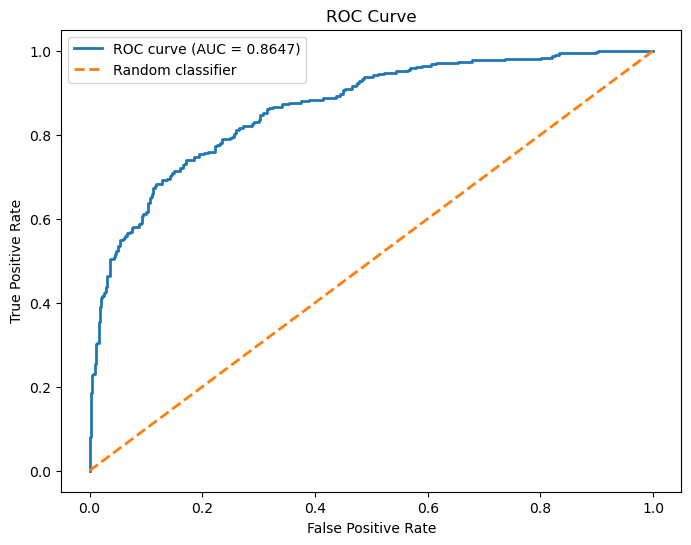

In [40]:
# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)
roc_auc_value = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], '--', lw=2, label='Random classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Сохранение графика
plt.savefig('figures/roc.png')
plt.show()


#### 2.3.5. Сравнение бейзлайна и логистической регрессии, текстовые выводы

In [41]:
# Сведение результатов в таблицу
comparison_results = pd.DataFrame({
    'Model': ['DummyClassifier', 'LogisticRegression'],
    'Accuracy': [baseline_results['accuracy'], logreg_results['accuracy']],
    'ROC-AUC': [baseline_results['roc_auc'], logreg_results['roc_auc']],
    'Precision': ['-', logreg_results['precision']],
    'Recall': ['-', logreg_results['recall']],
    'F1': ['-', logreg_results['f1']]
})

print("Сравнение результатов бейзлайна и логистической регрессии:")
display(comparison_results)
print(f"\nУлучшение accuracy: {logreg_results['accuracy'] - baseline_results['accuracy']:.4f}")
print(f"Улучшение ROC-AUC: {logreg_results['roc_auc'] - baseline_results['roc_auc']:.4f}")

Сравнение результатов бейзлайна и логистической регрессии:


,Model,Accuracy,ROC-AUC,Precision,Recall,F1
0,DummyClassifier,0.589333,0.500000,-,-,-
1,LogisticRegression,0.793333,0.864709,0.78022,0.691558,0.733219



Улучшение accuracy: 0.2040
Улучшение ROC-AUC: 0.3647


#### Выводы и анализ

Результаты показывают существенное улучшение качества модели при переходе от бейзлайна к логистической регрессии. DummyClassifier, предсказывающий most_frequent класс, достигает accuracy 58.9% и roc-auc 0.5. В то же время LogisticRegression с оптимально подобранным параметром C достигает 79,3% accuracy и 0.86 roc-auc, что превосходит бейзлайн на 20% в точности и на 0.36 в roc-auc.

Параметр регуляризации C контролирует степень переобучия или недообучения: меньшие значения C препятствуют переобучению, но могут привести к недообучению, тогда как большие значения позволяют модели лучше адаптироваться к данным, но соответственно могут привеси к переобучению. В нашем случае оптимальное значение было найдено через кросс-валидацию по значениям 0.01, 0.1, 1.0, 10.0.

Логистическая регрессия является разумным выбором для этой задачи прогнозирования дефолта, поскольку она легко интерпретируема (можно понять что на что влияет), показывает высокое качество и быстро обучается.

**Дополнительные метрики и графики**

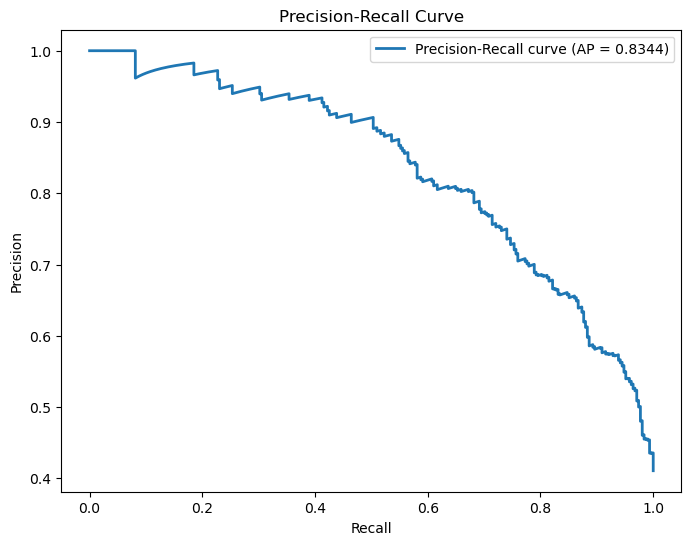

In [42]:
# Значения для PR
prec, recll, ths = precision_recall_curve(y_test, y_prob_logreg)
avr_precision = average_precision_score(y_test, y_prob_logreg)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recll, prec, lw=2, label=f'Precision-Recall curve (AP = {avr_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
# Сохранение графика
plt.savefig('figures/pr.png')
plt.show()

AP (Average Precision) = 0.8344
PR - кривая полезна для несбалансированных данных: она показывает зависимость между точностью и полнотой при разных порогах классификации.

In [44]:
# Анализ метрик при пороге 0.5 например
threshold = 0.5
y_pred_custom = (y_prob_logreg >= threshold).astype(int)

print(f"Метрики при пороге {threshold}:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_custom):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_custom):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_custom):.4f}")

Метрики при пороге 0.5:
Accuracy:  0.7933
Precision: 0.7802
Recall:    0.6916
F1-score:  0.7332
